In [1]:
#|default_exp app

## Gradio Pets

In [13]:
#|export
from fastai.vision.all import *
import timm

In [14]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=RegexLabeller(pat = r'^([^/]+)_\d+'),
    item_tfms=Resize(224))

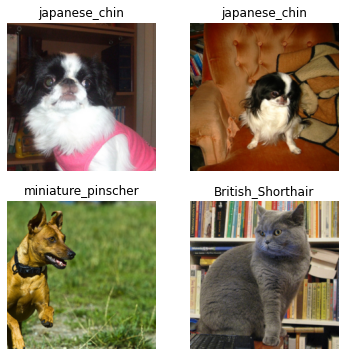

In [4]:
dls.show_batch(max_n=4)

In [15]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.445867,0.346198,0.111637,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.445303,0.355303,0.118403,00:11
1,0.272172,0.277282,0.089310,00:10
2,0.132497,0.234300,0.069689,00:11


In [8]:
learn = vision_learner(dls, 'convnext_tiny_in22k', metrics=error_rate).to_fp16()
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.139672,0.274477,0.088633,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.309106,0.238995,0.075101,00:13
1,0.221543,0.203345,0.066306,00:13
2,0.144560,0.185355,0.054127,00:13


In [10]:
learn.export('model.pkl')

In [11]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=RegexLabeller(pat = r'^([^/]+)_\d+'),
    item_tfms=Resize(224, method='squish'))

In [12]:
learn = vision_learner(dls, 'beit_base_patch16_224_in22k', metrics=error_rate).to_fp16()
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.265248,0.228790,0.072395,00:18


epoch,train_loss,valid_loss,error_rate,time
0,0.231022,0.192724,0.066306,00:24
1,0.146059,0.193486,0.058863,00:24
2,0.076066,0.162554,0.049391,00:24
